In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [22]:
#Defining means and covariances for the distributions
mean1 = [0,0]
mean2 = [10,0]
mean3 = [0,6]
mean4 = [9,8]
means = np.array([mean1, mean2, mean3, mean4])      #needed for the plots later
cov1 = np.identity(2)
cov2 = [[1,0.2],[0.2,1.5]]
cov3 = [[1,0.4],[0.4,1.1]]
cov4 = [[0.3,0.2],[0.2,0.5]]
n_samples = 1000

#creating the data set Train to which kmeans will be fitted later
Train1 = np.random.multivariate_normal(mean1,cov1,int(n_samples*0.25))
Train2 = np.random.multivariate_normal(mean2,cov2,int(n_samples*0.25))
Train3 = np.random.multivariate_normal(mean3,cov3,int(n_samples*0.25))
Train4 = np.random.multivariate_normal(mean4,cov4,int(n_samples*0.25))
Train = np.concatenate((Train1,Train2,Train3,Train4), axis=0)

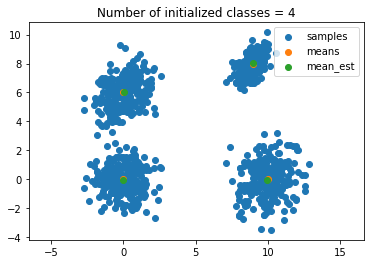

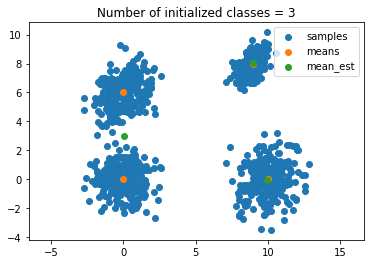

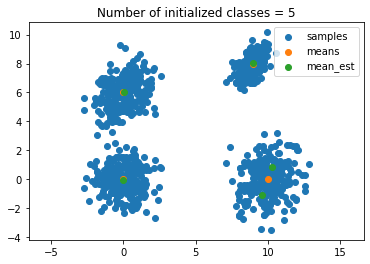

In [64]:
#running kmeans for different numbers of initialized classes
C = [4,3,5]
for c in C:
    kmeans = KMeans(n_clusters=c, init='random', algorithm='full', n_init=1, random_state=50)
    kmeans.fit(Train)

    #plotting the data and the results
    plt.scatter(Train[:,0], Train[:,1], label='samples')
    plt.scatter(means[:,0], means[:,1], label='means')
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], label='mean_est')
    plt.axis('equal')
    plt.legend()
    plt.title('Number of initialized classes = ' + str(c))
    plt.show()

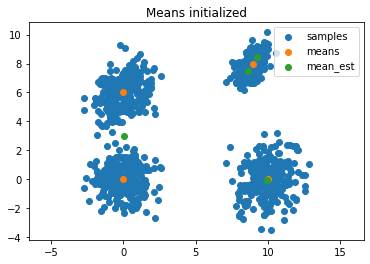

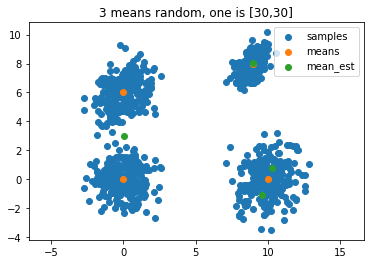

In [65]:
#running kmeans for two additional initializations  
means_init1 = np.array([[-2,-2], [-2.1,-2.1], [-2,-2.2], [-2.1,-2.2]])
means_init2 = np.array([[np.random.randint(-5,15),np.random.randint(-4,11)], [np.random.randint(-5,15),np.random.randint(-4,11)], [np.random.randint(-5,15),np.random.randint(-4,11)], [30,30]]) #x- and y-value are randomly chosen within the range these values lie in the Train data set
means_init = [means_init1, means_init2]
titles = ['Means initialized', '3 means random, one is [30,30]']

for i in range(len(means_init)):
    kmeans = KMeans(n_clusters=4, init=means_init[i], algorithm='full', random_state=1)
    kmeans.fit(Train)

    plt.scatter(Train[:,0], Train[:,1], label='samples')
    plt.scatter(means[:,0], means[:,1], label='means')
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], label='mean_est')
    plt.axis('equal')
    plt.legend()
    plt.title(titles[i])
    plt.show()